<br><p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold">
Matplotlib: анализ <br> <br> <br>Визуализация данных</p><br><br>

<br><br><center><h1 style="font-size:2em;color:#2467C0">Показатели мирового развития</h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="https://upload.wikimedia.org/wikipedia/commons/4/46/North_South_divide.svg" align="middle" style="width:550px;height:360px;"/></td>
<td>
В этом ноутбуке будем использовать набор данных(датасет) находящийся в открытом досупе. <a href="https://www.kaggle.com">Kaggle</a>. Это  <a href="https://www.kaggle.com/worldbank/world-development-indicators">набор показатели мирового развития</a> полученный из Всемирного банка, содержащий более тысячи ежегодных показателей экономического развития из сотен стран по всему миру.
<br>
<br>
Это немного модифицированная версия оригинального датасета из <a href="http://data.worldbank.org/data-catalog/world-development-indicators">Всемирного банка</a>
<br>
<br>
Список <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/indicators-in-data">доступных показателей</a> и <a href="https://www.kaggle.com/benhamner/d/worldbank/world-development-indicators/countries-in-the-wdi-data">лист доступных стран</a>.
</td>
</tr>
</table>

#### Source: https://www.kaggle.com/worldbank/world-development-indicators
#### Файл: Indicators.csv

# Шаг 1: Первоначальное исследование набора данных

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
def errorr(kek, lol):
    s = 0
    

In [3]:
x = np.linspace(0, 90, num=10000)


In [4]:
data = pd.read_csv('Indicators.csv')
data.shape

(5656458, 6)

Это очень большой датасет, по крайней мере по строкам. Но с шестью столбцами.

In [5]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Он содержит различные показатели для разных стра с годами и значениями.

### Сколько УНИКАЛЬНЫХ названий стран?

In [6]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

### Кодов стран столько же?

In [7]:
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

### Показателей много или мало?

In [8]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

### Данные за сколько лет мы имеем?

In [9]:
years = data['Year'].unique().tolist()
len(years)

56

### Какой диапазон лет?

In [10]:
print(min(years)," to ",max(years))

1960  to  2015


<p style="font-family: Arial; font-size:2.5em;color:blue; font-style:bold">
Matplotlib: базовые графики, Часть 1</p><br>

### Выберем страны и показатели для исследований: выбросы CO2 на душу населения и США

In [11]:
# выберем CO2 выбросы для США
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage это те показатели, которые соединящющие код США и выбросы СО2.
stage = data[mask1 & mask2]

In [12]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


### Посмотрим, как выбросы меняются с течением времени

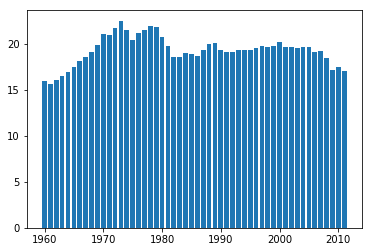

In [13]:
# выбираем года
years = stage['Year'].values
# выбираем значения СО2 
co2 = stage['Value'].values

# создаём
plt.bar(years,co2)
plt.show()

Оказывается, выбросы на душу населения со временем немного снизились, но давайте сделаем график немного более привлекательным, прежде чем мы продолжим его исследовать.

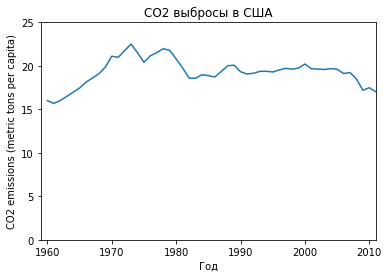

In [14]:
# переключаемся на график линий
plt.plot(stage['Year'].values, stage['Value'].values)

# подпишем оси
plt.xlabel('Год')
plt.ylabel(stage['IndicatorName'].iloc[0])

# подпишем график
plt.title('CO2 выбросы в США')

# для правдоподобия, y будет начинаться с 0
plt.axis([1959, 2011,0,25])

plt.show()

### Используем гистограммы для исследования распределения значений
Мы также можем изобразить данные как гистрограмму для комфортного исследования различий выбросов углекислого газа.

In [15]:
hist_data = stage['Value'].values

In [16]:
print(len(hist_data))

52


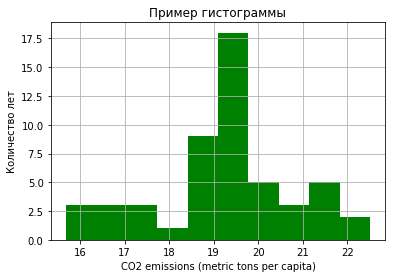

In [17]:
# гистограмма датасета
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('Количество лет')
plt.title('Пример гистограммы')

plt.grid(True)

plt.show()

### Но как цифры США относятся к остальным странам?

In [18]:
# выберем CO2 выбросы для всех стран в 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# применим маску
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


Для скольких стран у нас есть данные о выбросах CO2 на душу населения в 2011 году

In [19]:
print(len(co2_2011))

232


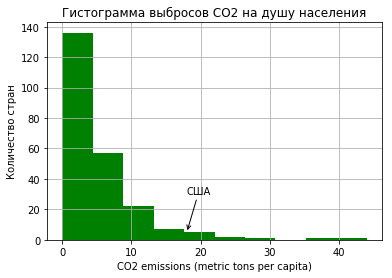

In [20]:
# построим гистограмму выбросов на душу населения по странам

# subplots возвращают кортеж с рисунком, осями аттрибутов
fig, ax = plt.subplots()

ax.annotate("США",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('Количество стран')
plt.title('Гистограмма выбросов СО2 на душу населения')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

Итак США примерно 18-ая по выбросам, что достаточно высокий показатель среди других стран.

Интересен следующий шаг, оставляемый вам. Нужно исследовать как это  влияет на другие индустрриальные нации и посмотреть на резко отличающиейся значения этих значений в 40-ые.

<p style="font-family: Arial; font-size:2.0em;color:blue; font-style:bold">
Matplotlib: Базовые посроения, Часть 2</p>

### Связь между ВВП и CO2 выбросы в США

In [21]:
# выберем ВВП на душу населения в США
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

gdp_stage = data[mask1 & mask2]

#график gdp_stage vs stage

In [22]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


In [23]:
stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256


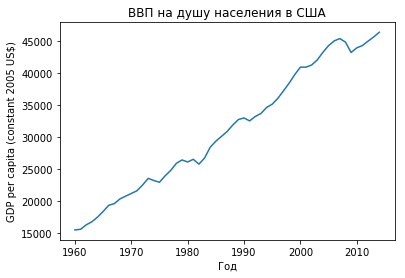

In [24]:
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

plt.xlabel('Год')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

plt.title('ВВП на душу населения в США')

plt.show()

Таким образом, хотя мы наблюдаем снижение выбросов CO2, это, похоже, не приводит к снижению ВВП на душу населения.

### Диаграмма рассеяния для противопоставления ВВП и CO2 выбросов (на душу)

Сначал нам нужно убедиться, что мы смотрим на одинаковые отрезки времени.

In [25]:
print("ВВП Min Год = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min Год = ", stage['Year'].min(), "max: ", stage['Year'].max())

ВВП Min Год =  1960 max:  2014
CO2 Min Год =  1960 max:  2011


Есть 3 лишних года с данными о ВВП, отсечём их, чтобы диаграмма имела одинаковые длины массивов для сравнения (это нужно для графика)

In [26]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


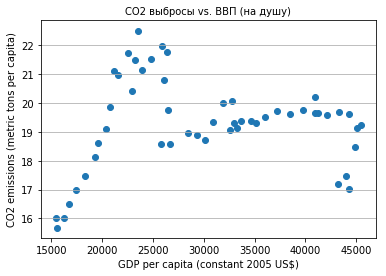

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Сетка линий, Xticks, Xlabel, Ylabel(штризов на X, подписей Х и Y)

axis.yaxis.grid(True)
axis.set_title('CO2 выбросы vs. ВВП (на душу)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

Не похоже, что есть сильная взаимосвязь. Можем проверить это, если взглянем на корреляцию.

In [28]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.07676005],
       [0.07676005, 1.        ]])

Корреляция = 0.07, это очень мало.

Вы можете продолжить исследовать, чтобы посмотреть на взаимосвязь ВВП и выбросов углекислого газа в других странах. Вдруг она сильнее у развивающихся стран?

# Часть 2

In [29]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

data = pd.read_csv('./Indicators.csv')
data.shape

(5656458, 6)

In [30]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

Мы уже видели как выбросы СО2 на душу населения США отличаются от других стран, посмотрим, сможем ли мы найти больше общих показателей между странами.

Чтобы было повеселее, выберем страны рандомно.

In [31]:
# Фильтр 1

# Выбранные года
yearsFilter = [2010, 2011, 2012, 2013, 2014]

In [32]:
# Фильтр 2 

# Выберем 2 случайные страны
countryFilter = random.sample(countries, 2)

In [33]:
countryFilter

['Israel', 'Canada']

In [34]:
# Фильтр 3

# Выберем 1 случайны показатель
indicatorsFilter = random.sample(indicators, 1)
indicatorsFilter

['Lower secondary completion rate, male (%)']

# Проблема:  у нас отсутствуют данные.
# Не для всех стран у нас есть показатели за все года

Чтобы решить это, нам нужно найти две страны и два показателя, для которых у нас есть данные на весь период времени.

In [35]:
filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country1_data = data.loc[filterMesh]

In [36]:
len(country1_data)

4

In [37]:
filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
country2_data = data.loc[filterMesh]

In [38]:
len(country2_data)

0

# Итак выберем показатели и страны, для которых у нас есть данные

Код снизу будет случайно выбирать страны и показатели, пока не найдёт две страны, у которых есть соотвествующие данные. 

In [39]:
filteredData1 = []
filteredData2 = []

In [40]:
'''
График: 
countryFilter:    выбрать две страны, 
indicatorsFilter: выбрать показатель, 
yearsFilter: график для лет в yearsFilter
'''

while(len(filteredData1) < len(yearsFilter)-1):
    # выбираем показатель
    indicatorsFilter = random.sample(indicators, 1)
    countryFilter    = random.sample(countries, 2)
    # как много строк, которые содержат название страны, показатель и год
    # filterMesh возвращает вектор bool'ов
    filterMesh = (data['CountryName'] == countryFilter[0]) & (data['IndicatorName'].isin(indicatorsFilter)) & (data['Year'].isin(yearsFilter))
    # у каких строк условие выполнилось?
    filteredData1 = data.loc[filterMesh]
    filteredData1 = filteredData1[['CountryName','IndicatorName','Year','Value']]
    
    # выводим это, если условие около while верно
    if(len(filteredData1) < len(yearsFilter)-1):
        print('Пропускаем ... {0} так как найдено мало строк ({1})'.format(indicatorsFilter, len(filteredData1)))


Пропускаем ... ['All education staff compensation, total (% of total expenditure in public institutions)'] так как найдено мало строк (0)


In [41]:
# Что же мы нашли?
indicatorsFilter

['Merchandise exports to high-income economies (% of total merchandise exports)']

In [42]:
len(filteredData1)

5

In [43]:
'''
Вторая страна
'''

while(len(filteredData2) < len(filteredData1)-1):
    filterMesh = (data['CountryName'] == countryFilter[1]) & (data['IndicatorName'].isin(indicatorsFilter))\
                & (data['Year'].isin(yearsFilter))
    filteredData2 = data.loc[filterMesh]
    filteredData2 = filteredData2[['CountryName','IndicatorName','Year','Value']]
    #выбираем новый показатель
    old = countryFilter[1]
    countryFilter[1]    = random.sample(countries, 1)[0]
    
    if(len(filteredData2) < len(filteredData1)-1):
        print('Пропускам ... {0} так как найдено мало строк ({1})'.format(old, len(filteredData2)))

In [44]:
if len(filteredData1) < len(filteredData2):
    small = len(filteredData1)
else:
    small = len(filteredData2)

In [45]:
filteredData1=filteredData1[0:small]
filteredData2=filteredData2[0:small]

In [46]:
filteredData1

,CountryName,IndicatorName,Year,Value
4935547,Jamaica,Merchandise exports to high-income economies (...,2010,91.576200
5116939,Jamaica,Merchandise exports to high-income economies (...,2011,92.771411
5292480,Jamaica,Merchandise exports to high-income economies (...,2012,88.922408
5458009,Jamaica,Merchandise exports to high-income economies (...,2013,89.912707
5588906,Jamaica,Merchandise exports to high-income economies (...,2014,89.752103


In [47]:
filteredData2

,CountryName,IndicatorName,Year,Value
4912569,Faeroe Islands,Merchandise exports to high-income economies (...,2010,82.931151
5095193,Faeroe Islands,Merchandise exports to high-income economies (...,2011,83.158624
5270704,Faeroe Islands,Merchandise exports to high-income economies (...,2012,79.667041
5438761,Faeroe Islands,Merchandise exports to high-income economies (...,2013,80.073830
5575399,Faeroe Islands,Merchandise exports to high-income economies (...,2014,79.387464


<br><p style="font-family: Arial; font-size:2.75em;color:blue; font-style:bold">
Matplotlib: дополнительные примеры</p><br>

## Пример: точечная диаграмма

Теперь у нас есть данные для двух стран для одинаковых показателей, построим график, используя диаграмму рассеяния.

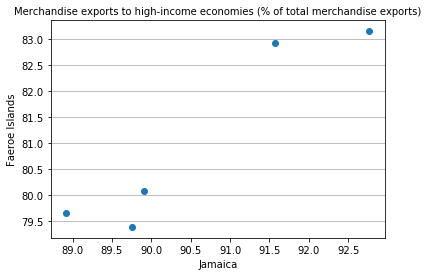

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Сетка lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title(indicatorsFilter[0],fontsize=10)
axis.set_xlabel(filteredData1['CountryName'].iloc[0],fontsize=10)
axis.set_ylabel(filteredData2['CountryName'].iloc[0],fontsize=10)

X = filteredData1['Value']
Y = filteredData2['Value']

axis.scatter(X, Y)

## Пример: график отрезков

Тут мы построим график значений показателей, меняющихся с течением времени для каждой страны.

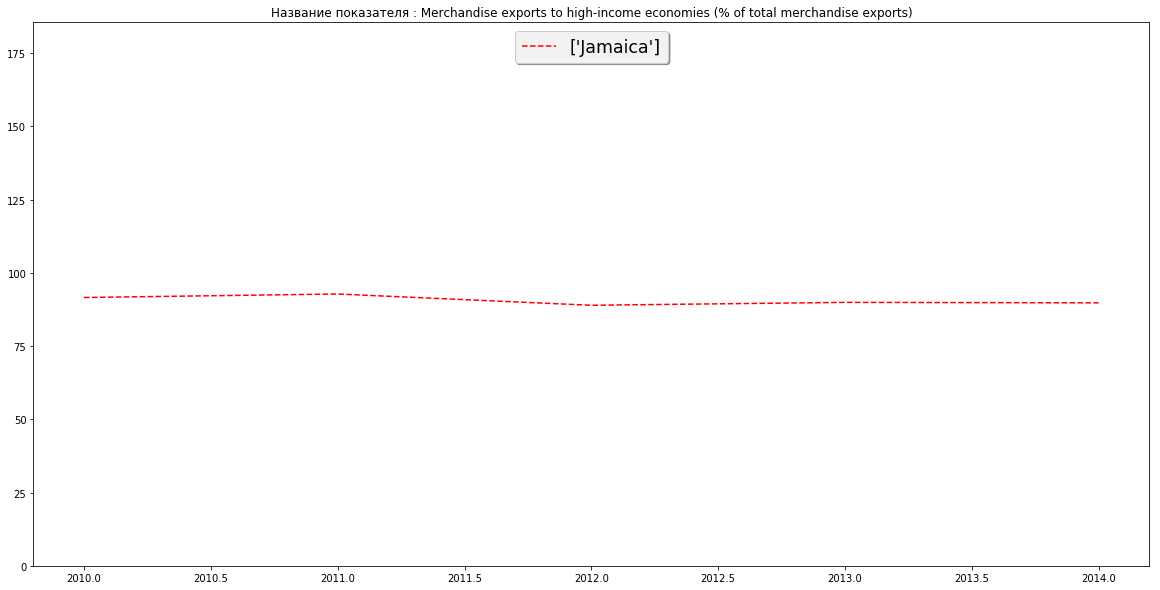

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))

ax.set_ylim(min(0,filteredData1['Value'].min()), 2*filteredData1['Value'].max())
ax.set_title('Название показателя : ' + indicatorsFilter[0])
ax.plot(filteredData1['Year'], filteredData1['Value'] , 'r--', label=filteredData1['CountryName'].unique()) 

# добавим легенду
legend = plt.legend(loc = 'upper center', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

# прямоугольник вокруг легенды
frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

## Let's plot country #2

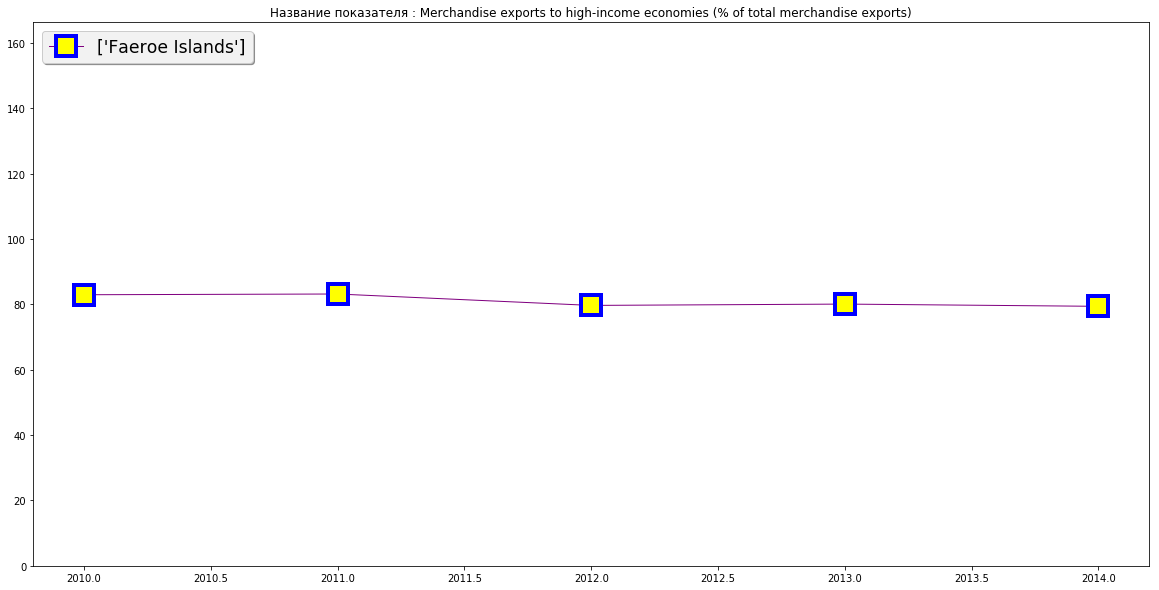

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

# Отрегулируем верхний и нижний пределы, чтобы выровнять график по центру
ax.set_ylim(min(0,filteredData2['Value'].min()), 2*filteredData2['Value'].max())

ax.set_title('Название показателя : ' + indicatorsFilter[0])
ax.plot(filteredData2['Year'], filteredData2['Value'] ,
         label=filteredData2['CountryName'].unique(),
         color="purple", lw=1, ls='-', 
         marker='s', markersize=20, 
         markerfacecolor="yellow", markeredgewidth=4, markeredgecolor="blue") 

legend = plt.legend(loc = 'upper left', 
                    shadow=True,
                    prop={'weight':'roman','size':'xx-large'})

frame = legend.get_frame()
frame.set_facecolor('.95')
plt.show()

# Пример (случайный датасет)

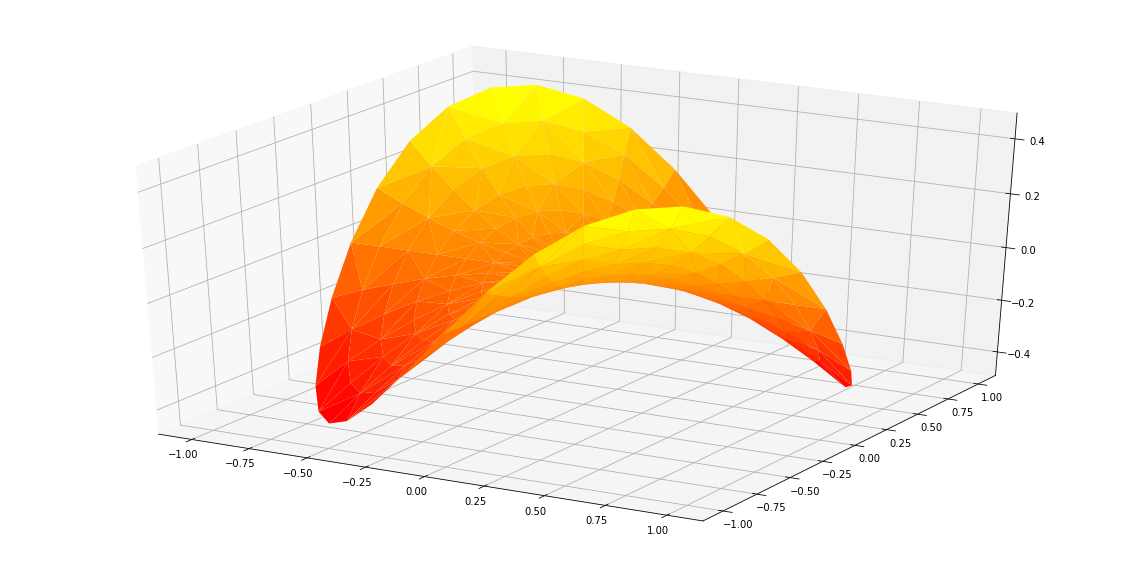

In [51]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

countof_angles = 36
countof_radii  = 8

# массив - радиусы
array_rad = np.linspace(0.125, 1.0, countof_radii)

# массив - углы
array_ang = np.linspace(0, 2*np.pi, countof_angles, endpoint=False)

# повторим все углы для каждого радиуса
array_ang = np.repeat(array_ang[...,np.newaxis], countof_radii, axis=1)

# из полярныз (радиусы, углы) координат к декартовым (x, y) координатам
x = np.append(0, (array_rad*np.cos(array_ang)).flatten())
y = np.append(0, (array_rad*np.sin(array_ang)).flatten())

# поверхность в форме седла
z = np.sin(-x*y)

fig = plt.figure(figsize=(20,10))
ax  = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.autumn, linewidth=0.2)

plt.show()
fig.savefig("vis_3d.png")

# Пример (случайный датасет)

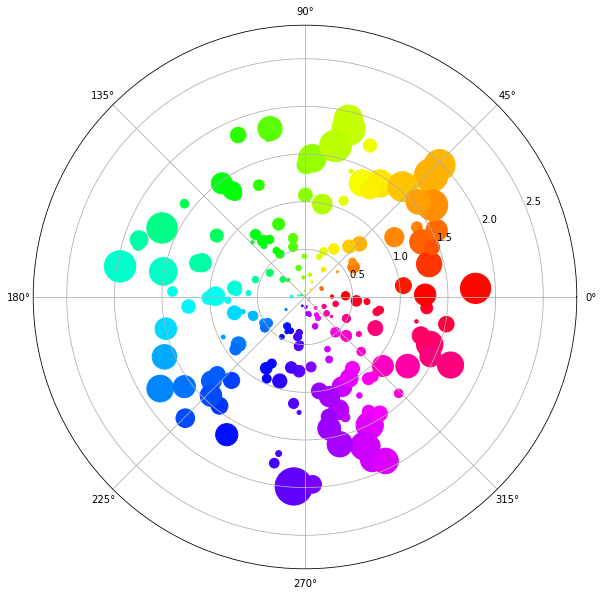

In [52]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

n_points = 200

radius   = 2 * np.random.rand(n_points)
angles   = 2 * (np.pi) * np.random.rand(n_points)
area     = 400 * (radius**2) * np.random.rand(n_points)

colors = angles

fig = plt.figure(figsize=(20,10))
ax  = plt.subplot(111, polar=True)

c = plt.scatter(angles, radius, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(1.95)

plt.show()
fig.savefig("vis_bubbleplot.png")

# Пример 4: графики-ящики (случайный датасет)

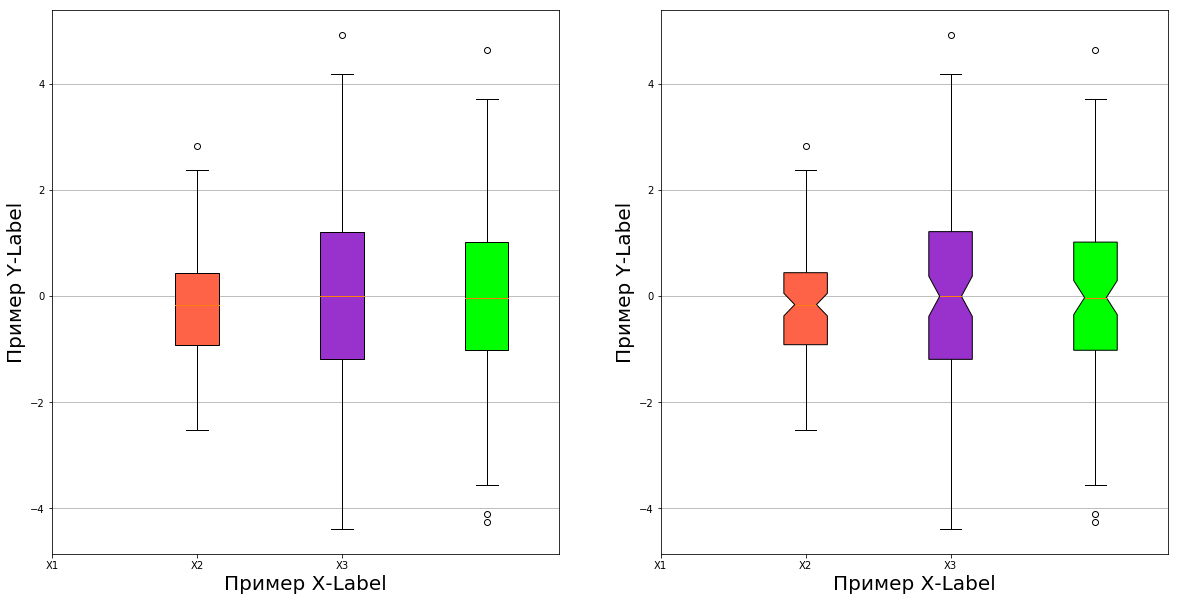

In [53]:
np.random.seed(452)

# Три массива по 100 точек каждый
A1 = np.random.normal(0, 1, 100)
A2 = np.random.normal(0, 2, 100)
A3 = np.random.normal(0, 1.5, 100)

# Соединим их
data = [ A1, A2, A3 ]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))


# Box plot: форма - вырез
bplot1 = axes[1].boxplot(data,
                         notch=True,  
                         vert=True,           # вертикальное выравнивание
                         patch_artist=True)   # цвет

# Box plot: форма -прямоугольник 
bplot2 = axes[0].boxplot(data,
                         vert=True,           # вертикальное выравнивание
                         patch_artist=True)   # цвет




colors = ['tomato', 'darkorchid', 'lime']
# больше цветов по ссылке: http://matplotlib.org/examples/color/named_colors.html

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Сетка линий, Xticks, Xlabel, Ylabel
for axis in axes:
    axis.yaxis.grid(True)
    axis.set_xticks([y for y in range(len(data))], )
    axis.set_xlabel('Пример X-Label',fontsize=20)
    axis.set_ylabel('Пример Y-Label',fontsize=20)

    
# Xtick подписи
plt.setp(axes, xticks=[y for y in range(len(data))],
         xticklabels=['X1', 'X2', 'X3'])

plt.show()
fig.savefig("vis_boxplot.png")